In [ ]:
#Final project time!!

In [31]:
print("Hello world! and welcome to our final project")

Hello world! and welcome to our final project


Introduction: (TBA)

In [32]:
print("Team members: Isaac Gazmararian, Max Roquitte, Madison Bormon, Michael Shi")

Team members: Isaac Gazmararian, Max Roquitte, Madison Bormon, Michael Shi


In [37]:
#import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates

In [9]:
#import our data
circuits = pd.read_csv("data_raw/circuits.csv")
races = pd.read_csv("data_raw/races.csv")
results = pd.read_csv("data_raw/results.csv")
drivers = pd.read_csv("data_raw/drivers.csv")

In [13]:
#first let's grab only the necessary data from circuits

circuits_subsetcols = ["country","circuitId"]

circuits_clean = circuits[circuits_subsetcols]
                       

And now we begin the merging!

In [34]:
#merging

races_merge_1 = pd.merge(circuits_clean,
                        races[["circuitId","raceId","year"]],
                        on = "circuitId",
                        how = "left")

races_merge_2 = pd.merge(races_merge_1,
                         results[["raceId","driverId","positionOrder"]],
                         on = "raceId",
                         how = "left"
                         )

races_merge_3 = pd.merge(races_merge_2,
                         drivers[["driverId","nationality"]],
                         on = "driverId",
                         how = "left",
                         )



In [43]:
from math import nan
import math

In [56]:
#now let's allow ourselves to boolean nationality with country

countries = pd.read_csv("data_raw/countries.csv")

#rename column so it can be merged

countries.rename(columns = {'Nationality': 'nationality'}, inplace = True)

#merge!

races_merge_4 = pd.merge(races_merge_3,
                         countries[["nationality","Name"]],
                         on = "nationality",
                         how = "left"
                         )

In [57]:
#let's clean this up

races_merge_4.dtypes

#remove the nans

df1= races_merge_4.dropna(subset=['driverId'])

In [76]:
#now let's find the mean values

df_home = (df1.query("Name == country")
                       .groupby(["driverId"])
                        .agg(mean_position_home = ('positionOrder','mean'),
                             sd_position_home =   ('positionOrder','std'),
                             count_obs_home   = ('positionOrder',len))
                         .reset_index()
                             )

display(df_home)

df_nothome = (df1.query("Name != country")
                       .groupby(["driverId"])
                        .agg(mean_position = ('positionOrder','mean'),
                             sd_position =   ('positionOrder','std'),
                             count_obs   = ('positionOrder',len))
                         .reset_index()
                             )

display(df_nothome)

,driverId,mean_position_home,sd_position_home,count_obs_home
0,2.0,11.352941,6.112908,17
1,3.0,9.090909,6.057302,11
2,4.0,7.625000,6.499582,24
3,6.0,15.000000,0.000000,2
4,7.0,17.000000,NaN,1
...,...,...,...,...
354,844.0,15.500000,7.724420,4
355,845.0,18.000000,NaN,1
356,849.0,16.000000,NaN,1
357,852.0,13.000000,NaN,1


,driverId,mean_position,sd_position,count_obs
0,1.0,4.787097,5.644239,310
1,2.0,10.658683,5.341103,167
2,3.0,8.205128,6.277022,195
3,4.0,8.556886,6.196100,334
4,5.0,13.285714,5.625599,112
...,...,...,...,...
799,852.0,13.906977,4.319468,43
800,853.0,17.857143,1.796823,21
801,854.0,15.659091,3.057155,44
802,855.0,14.318182,3.415616,66


In [87]:
df_merged = pd.merge(df_home,
                     df_nothome[["driverId","mean_position","sd_position","count_obs"]],
                     on = "driverId",
                     how = "left"
                     )

df_merged["difference"] = df_merged["mean_position_home"] - df_merged["mean_position"]

df_merged["difference"].mean()

-0.5018600926359847

Text(0.5, 1.0, 'comparing home and not home')

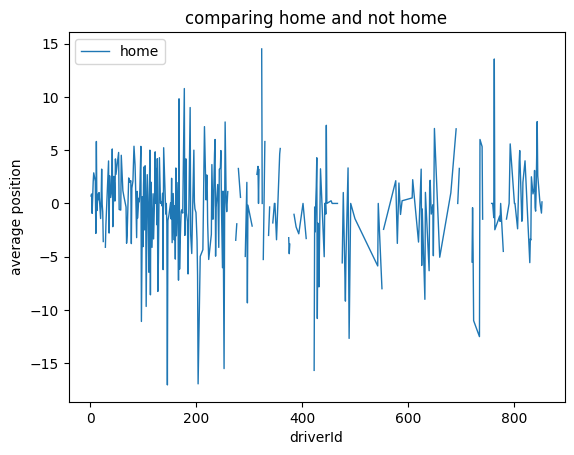

In [84]:
#now let's plot

# Extract information that we want to plot
# Indicate that "date" is the x-axis
plot_data = df_merged[["driverId","difference"]].set_index("driverId")

# Generate basic lineplot 
# We add with the subplot environment and add more info
# The linewidth option controls how thin the lines are
# With subplots we use "set_xlabel" rather than "xlabel"
fig, ax = plt.subplots(1,1)
ax.plot(plot_data,
        linewidth=1)
ax.legend(["home","not home"])
ax.set_ylabel("average position")
ax.set_xlabel("driverId")
ax.set_title("comparing home and not home")